In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# =====================================================
# Dynamic Phasor Simulation
# - Example 1: Amplitude-varying signal (magnitude)
# - Example 2: Phase-varying signal (phase)
# This script is used to generate the figures in the report.
# =====================================================

# -------------------------
# Common parameters
# -------------------------
f0 = 50.0                    # [Hz] fundamental frequency
omega0 = 2 * np.pi * f0      # [rad/s] fundamental angular frequency
T0 = 1.0 / f0                # [s] fundamental period

fs = 10_000.0                # [Hz] sampling frequency
dt = 1.0 / fs                # [s] sampling interval
t_end = 0.4                  # [s] total simulation time
t = np.arange(0.0, t_end + dt, dt)


def classical_dynamic_phasor(x, t, omega0, T0):
    """
    Compute the classical (period-averaged) dynamic phasor for k = 1.

    X_class(t) = (1/T0) ∫_{t-T0}^{t} x(τ) e^{-j ω0 τ} dτ

    The integral is evaluated numerically over a sliding window
    of length T0 using the trapezoidal rule.
    """
    dt = t[1] - t[0]
    Nwin = int(round(T0 / dt))         # number of samples per period
    N = len(t)
    X = np.full_like(t, np.nan, dtype=complex)

    for n in range(Nwin - 1, N):
        tau = t[n - Nwin + 1 : n + 1]          # time values in the window
        xw  = x[n - Nwin + 1 : n + 1]          # signal values in the window
        integrand = xw * np.exp(-1j * omega0 * tau)
        X[n] = (1.0 / T0) * np.trapezoid(integrand, tau)

    return X


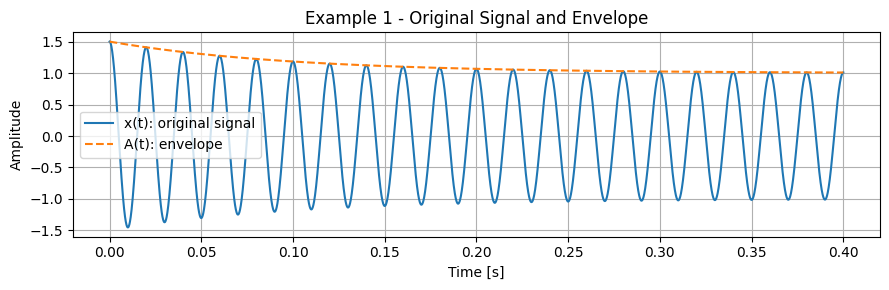

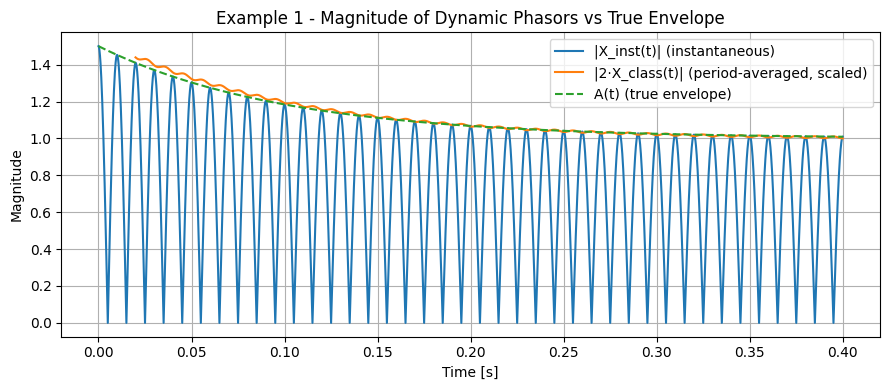

In [7]:
# =====================================================
# Example 1: Amplitude-varying signal (magnitude)
# =====================================================

# Envelope: A(t) = 1 + 0.5 * exp(-t / tau_env)
tau_env = 0.1
A_t = 1.0 + 0.5 * np.exp(-t / tau_env)
x_amp = A_t * np.cos(omega0 * t)      # scalar test signal x(t)

# Instantaneous dynamic phasor (simple baseband representation)
X_inst_amp = x_amp * np.exp(-1j * omega0 * t)

# Classical dynamic phasor (k = 1)
X_class_amp = classical_dynamic_phasor(x_amp, t, omega0, T0)

# Theoretical relation: |X_class| ≈ A(t)/2 for a pure cosine.
# For comparison with the envelope, the magnitude is scaled by 2.
X_class_amp_scaled = 2.0 * X_class_amp

# ---- Figure 1: original signal and envelope ----
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3))
ax1.plot(t, x_amp, label="x(t): original signal")
ax1.plot(t, A_t, "--", label="A(t): envelope")
ax1.set_title("Example 1 - Original Signal and Envelope")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")
ax1.grid(True)
ax1.legend()
fig1.tight_layout()

# ---- Figure 2: magnitude of phasors vs envelope ----
fig2, ax2 = plt.subplots(1, 1, figsize=(9, 4))
ax2.plot(t, np.abs(X_inst_amp), label="|X_inst(t)| (instantaneous)")
ax2.plot(t, np.abs(X_class_amp_scaled),
         label="|2·X_class(t)| (period-averaged, scaled)")
ax2.plot(t, A_t, "--", label="A(t) (true envelope)")
ax2.set_title("Example 1 - Magnitude of Dynamic Phasors vs True Envelope")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Magnitude")
ax2.grid(True)
ax2.legend()
fig2.tight_layout()

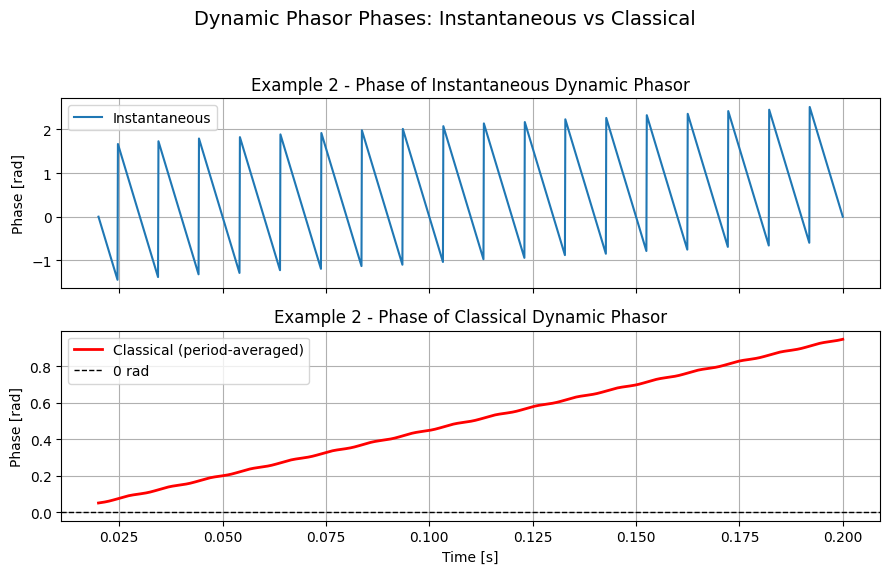

In [8]:
# =====================================================
# Example 2: Phase-varying signal (phase)
# =====================================================

# Here the amplitude is constant and the phase varies slowly:
# x_phi(t) = cos(omega0 * t + phi(t)),  phi(t) = 5 t
phi_t = 5.0 * t
x_phase = np.cos(omega0 * t + phi_t)

# Instantaneous dynamic phasor
X_inst_phase = x_phase * np.exp(-1j * omega0 * t)

# Classical dynamic phasor
X_class_phase = classical_dynamic_phasor(x_phase, t, omega0, T0)

# ---- Figure 3: phase of instantaneous vs classical phasor ----
fig3, (ax3a, ax3b) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# Only show times after one full period (t >= T0) to avoid NaN region
# and limit the view to 0–0.2 s for clarity.
t_max_view = 0.2
mask = (t >= T0) & (t <= t_max_view)

# (a) instantaneous phase (contains fast oscillations)
ax3a.plot(t[mask], np.unwrap(np.angle(X_inst_phase[mask])),
          label="Instantaneous")
ax3a.set_title("Example 2 - Phase of Instantaneous Dynamic Phasor")
ax3a.set_ylabel("Phase [rad]")
ax3a.grid(True)
ax3a.legend()

# (b) classical phase (smooth representation of slow phase φ(t))
ax3b.plot(t[mask], np.unwrap(np.angle(X_class_phase[mask])),
          "r", linewidth=2, label="Classical (period-averaged)")
ax3b.axhline(0.0, color="k", linewidth=1, linestyle="--", label="0 rad")
ax3b.set_title("Example 2 - Phase of Classical Dynamic Phasor")
ax3b.set_xlabel("Time [s]")
ax3b.set_ylabel("Phase [rad]")
ax3b.grid(True)
ax3b.legend()

fig3.suptitle("Dynamic Phasor Phases: Instantaneous vs Classical", fontsize=14)
fig3.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()